In [1]:
%load_ext autoreload
%autoreload 2
import pytest
import numpy as np
import intake
from cmip6_preprocessing.preprocessing import combined_preprocessing
col = intake.open_esm_datastore(
        "https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"
    )
cat = col.search(
    source_id="MPI-ESM1-2-HR",
    experiment_id="historical",
    variable_id="o2",
    table_id="Omon",
    member_id="r1i1p1f1",
)
ddict = cat.to_dataset_dict(
    zarr_kwargs={"consolidated": True}, preprocess=None
)
ds = ddict["CMIP.MPI-M.MPI-ESM1-2-HR.historical.Omon.gn"]
# check all dims for duplicates
# for di in ds.dims:
#     try:
#         assert len(ds[di]) == len(np.unique(ds[di]))
#     except:
#         print(di)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
                
--> There is/are 1 group(s)


In [32]:
ddict_pp = cat.to_dataset_dict(
    zarr_kwargs={"consolidated": True}, preprocess=combined_preprocessing
)
ds_pp = ddict_pp["CMIP.MPI-M.MPI-ESM1-2-HR.historical.Omon.gn"]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
                
--> There is/are 1 group(s)
non-unique values found at:[2 3])
non-unique values found at:[800 801])
non-unique values found at:[184 185])


In [33]:
def diagnose_doubles(data):
    u, idx = np.unique(data, return_index=True)
    missing = np.array([i for i in np.arange(len(data)) if i not in idx])
    if len(missing) > 0:
        missing_values = data[missing]
        print(f"Missing values Indicies[{missing}]/ Values[{missing_values}]")

In [34]:
diagnose_doubles(ds_pp.x.load().data)

In [35]:
diagnose_doubles(ds_pp.y.load().data)

In [22]:
np.hstack([ds_pp.y.load().data[400:].flatten(), ds_pp.y.load().data[-1], ds_pp.y.load().data[50]])

array([ 51.14887947,  51.14887947,  51.24554101,  51.24554101,
        51.24554101, -59.10098411])

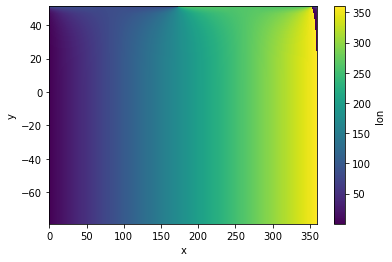

In [36]:
ds_pp.lon.plot()

In [5]:
u, idx = np.unique(ds_pp.x.data, return_index=True)
missing = np.array([i for i in np.arange(len(ds_pp.x)) if i not in idx])
missing

array([185, 187])

In [17]:
ds_pp.x[180:190]

<xarray.DataArray 'x' (x: 10)>
array([81.05388, 81.50388, 81.95388, 82.40388, 82.40388, 82.40388, 82.85388,
       83.30388, 83.75388, 84.20388])
Coordinates:
  * x        (x) float64 81.05 81.5 81.95 82.4 82.4 82.4 82.85 83.3 83.75 84.2

In [11]:
def check_unique(ds, var):
    assert len(ds[var].data) == len(np.unique(ds[var].data))
    
check_unique(ds, 'i')
check_unique(ds_pp, 'y')
check_unique(ds_pp, 'x')

AssertionError: 

In [7]:
assert len(ds.x) == len(np.unique())

<xarray.DataArray 'x' (x: 3)>
array([358.70388, 359.15388, 359.60388])
Coordinates:
  * x        (x) float64 358.7 359.2 359.6

In [8]:
np.interp()

<xarray.DataArray 'y' (y: 404)>
array([-78.674881, -78.283398, -77.891915, ...,  51.148879,  51.181034,
        51.245541])
Coordinates:
  * y        (y) float64 -78.67 -78.28 -77.89 -77.5 ... 51.12 51.15 51.18 51.25

In [ ]:
ds.x.diff('x').plot()

4182 iterations needed to fix non monotinic dim y
4183 iterations needed to fix non monotinic dim y
4184 iterations needed to fix non monotinic dim y
4185 iterations needed to fix non monotinic dim y
4186 iterations needed to fix non monotinic dim y
4187 iterations needed to fix non monotinic dim y
4188 iterations needed to fix non monotinic dim y

In [ ]:
ds.y.diff('y').plot()

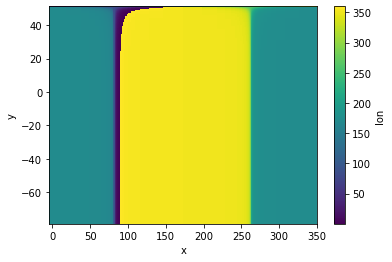

In [12]:
ds.lon.plot()